In [ ]:
# reminder to myself to answer q's as comments on the code

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/MonthlyModel2.csv')
df.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate
0,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
1,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.055038
2,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.029486
3,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013352
4,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000


In [ ]:
# CLEANING

In [ ]:
df.isnull().sum()

NTD ID                  0
Agency                  0
Organization Type       0
Mode                    0
Type of Service         0
                       ..
Trespasser Injuries     0
Suicide Injuries        0
Total Other Injuries    0
Total Injuries          0
Rate                    0
Length: 65, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None) # geeks for geeks

In [ ]:
# checking nulls
df.isnull().sum()

NTD ID                                        0
Agency                                        0
Organization Type                             0
Mode                                          0
Type of Service                               0
Rail (True/False)                             0
Primary UZA UACE Code                         0
Primary UZA Name                              0
Primary UZA Sq Miles                          0
Primary UZA Population                        0
Service Area Sq Miles                         0
Service Area Population                       0
Year                                          0
Month                                         0
Vehicles                                      0
Vehicle Revenue Miles                         0
Vehicle Revenue Hours                         0
Unlinked Passenger Trips                      0
Collisions with Motor Vehicle                 0
Collisions with Person                        0
Collisions with Fixed Object            

In [ ]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39729 entries, 0 to 39728
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NTD ID                                      39729 non-null  int64  
 1   Agency                                      39729 non-null  object 
 2   Organization Type                           39729 non-null  object 
 3   Mode                                        39729 non-null  object 
 4   Type of Service                             39729 non-null  object 
 5   Rail (True/False)                           39729 non-null  bool   
 6   Primary UZA UACE Code                       39729 non-null  int64  
 7   Primary UZA Name                            39729 non-null  object 
 8   Primary UZA Sq Miles                        39729 non-null  float64
 9   Primary UZA Population                      39729 non-null  int64  
 10  Service Ar

In [ ]:
# merging 'Year' & 'Month' as 'Date' for timeseries
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format = '%Y-%m')

# dropping the columns
df.drop(['Year', 'Month'], axis = 1, inplace = True)
# making 'Date' the index
df.set_index('Date', inplace = True)

In [ ]:
df.head() # checking if it's successful

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
2021-08-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.055038
2021-09-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.029486
2021-10-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013352
2021-11-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000


In [ ]:
import numpy as np
ref_date = df.index.min() # earliest date
df['Numerical Date'] = (df.index - ref_date).days.astype(np.float32) # days from earliest date
df.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate,Numerical Date
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.000000,181.0
2021-08-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.055038,212.0
2021-09-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.029486,243.0
2021-10-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.013352,273.0
2021-11-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.000000,304.0


In [ ]:
# i just usually make these in case i ever need it
import numpy as np

# creating a list with all numerical columns
numerical_cols = df.select_dtypes(include = np.number).columns

# creating a list with all categorical columns - mainly for label encoding
categorical_cols = df.select_dtypes(exclude = np.number).columns

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
pd.set_option('display.max_rows', 25) # back to default

In [ ]:
# FEATURE SELECTION

In [ ]:
df.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate,Numerical Date
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.000000,181.0
2021-08-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.055038,212.0
2021-09-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.029486,243.0
2021-10-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.013352,273.0
2021-11-01,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0.000000,304.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39729 entries, 2021-07-01 to 2023-06-01
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NTD ID                                      39729 non-null  int64  
 1   Agency                                      39729 non-null  object 
 2   Organization Type                           39729 non-null  object 
 3   Mode                                        39729 non-null  object 
 4   Type of Service                             39729 non-null  object 
 5   Rail (True/False)                           39729 non-null  bool   
 6   Primary UZA UACE Code                       39729 non-null  int64  
 7   Primary UZA Name                            39729 non-null  object 
 8   Primary UZA Sq Miles                        39729 non-null  float64
 9   Primary UZA Population                      39729 non-null  int64 

In [ ]:
# label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

data = df.copy() # copy to keep df as it is
lbl = LabelEncoder() # label encoder for categorical cols.

# for loop for ease
for c in categorical_cols: # previously made
  data[c] = lbl.fit_transform(data[c])
data.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate,Numerical Date
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0.000000,181.0
2021-08-01,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0.055038,212.0
2021-09-01,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0.029486,243.0
2021-10-01,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0.013352,273.0
2021-11-01,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0.000000,304.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39729 entries, 2021-07-01 to 2023-06-01
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NTD ID                                      39729 non-null  int64  
 1   Agency                                      39729 non-null  int64  
 2   Organization Type                           39729 non-null  int64  
 3   Mode                                        39729 non-null  int64  
 4   Type of Service                             39729 non-null  int64  
 5   Rail (True/False)                           39729 non-null  int64  
 6   Primary UZA UACE Code                       39729 non-null  int64  
 7   Primary UZA Name                            39729 non-null  int64  
 8   Primary UZA Sq Miles                        39729 non-null  float64
 9   Primary UZA Population                      39729 non-null  int64 

In [ ]:
df['Rate'].value_counts() # so we use regression

Rate
0.000000    18343
0.023035        2
0.039157        2
0.009539        2
0.058071        2
            ...  
0.042171        1
0.011133        1
0.047638        1
0.031750        1
0.047714        1
Name: count, Length: 21381, dtype: int64

In [ ]:
# defining the target & feature columns
X = data.drop(['Rate'], axis = 1) # don't need numerical date here.
y = data['Rate']

In [ ]:
# splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 30% test size, 70% train size

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# 1st method: low variance

var_selector = VarianceThreshold()

# training model based on the features
X_train_var = var_selector.fit_transform(X_train.drop(columns = ['Numerical Date']))
X_test_var = var_selector.transform(X_test.drop(columns = ['Numerical Date']))
var_features = X_train.drop(columns = ['Numerical Date']).columns[var_selector.get_support()]

print(f'Number of features selected: {len(var_features)}'
f'\n\nChosen features: {var_features}')

Number of features selected: 58

Chosen features: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fatalities',
       'Bicyclist Fatalities', 'Pedes

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling

sc = StandardScaler()
X_train_var = sc.fit_transform(X_train_var)
X_test_var = sc.fit_transform(X_test_var)

In [ ]:
from sklearn.linear_model import LinearRegression
# linear regression model

regression_var = LinearRegression()
regression_var.fit(X_train_var, y_train)

LinearRegression()

In [ ]:
# predicting linear regression Y Pred
ypred_regression_var = regression_var.predict(X_test_var)

In [ ]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
# calculating metrics

mse_regression_var = mse(y_test, ypred_regression_var)
r2_regression_var = r2(y_test, ypred_regression_var)

# printing metrics
print(f'Selected Features Using Variance Method: {var_features}'
f'\n\nMSE: {round(mse_regression_var, 5)}'
f'\nR2: {round(r2_regression_var, 5)}')

Selected Features Using Variance Method: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fatalities',
       'Bicyclist Fatalities', 'Pedestrian in 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
close = data['Rate']
close.index = pd.to_datetime(close.index)
close

Date
2021-07-01    0.000000
2021-08-01    0.055038
2021-09-01    0.029486
2021-10-01    0.013352
2021-11-01    0.000000
                ...   
2023-02-01    0.000000
2023-03-01    0.056691
2023-04-01    0.047714
2023-05-01    0.000000
2023-06-01    0.000000
Name: Rate, Length: 39729, dtype: float64

<Axes: xlabel='Date'>

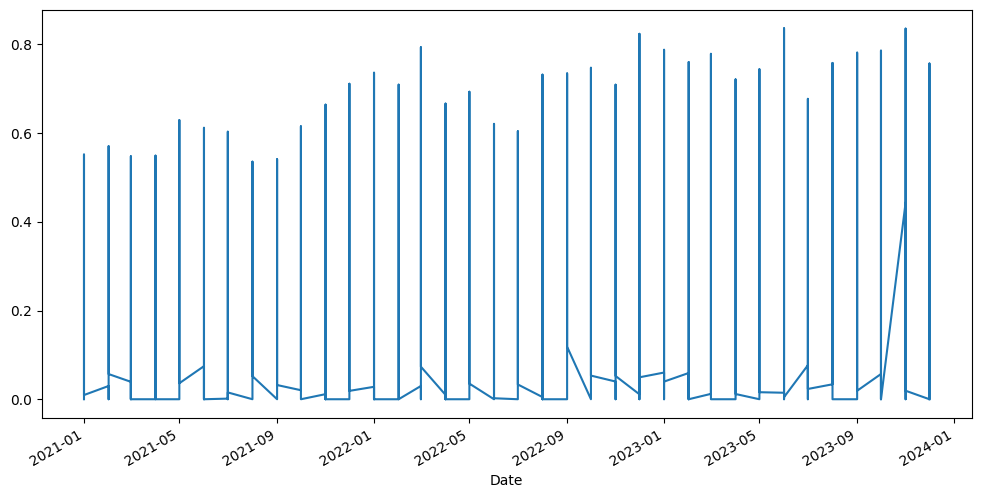

In [ ]:
plt.figure(figsize = (12, 6))
close.plot()

<Axes: xlabel='Date'>

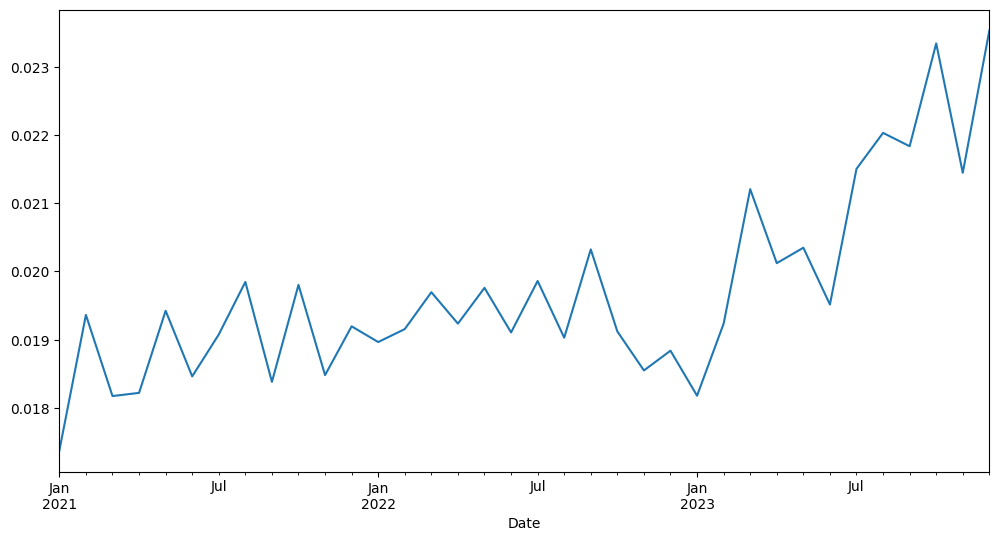

In [ ]:
close_grouped = data.groupby('Date')['Rate'].mean()
close_grouped.index = pd.to_datetime(close_grouped.index)
plt.figure(figsize = (12, 6))
close_grouped.plot()

In [ ]:
pd.set_option('display.max_rows', None) # geeks for geeks
df.index.value_counts()

Date
2022-12-01    1249
2023-03-01    1249
2023-01-01    1248
2023-02-01    1248
2022-10-01    1247
2022-11-01    1246
2023-04-01    1237
2021-06-01    1235
2021-03-01    1234
2021-05-01    1234
2023-06-01    1234
2023-05-01    1234
2021-04-01    1234
2021-02-01    1234
2021-01-01    1233
2021-10-01    1233
2021-12-01    1231
2021-11-01    1231
2021-07-01    1230
2021-09-01    1228
2021-08-01    1227
2022-09-01    1227
2022-02-01    1226
2022-01-01    1226
2022-06-01    1225
2022-07-01    1224
2022-08-01    1224
2022-05-01    1224
2022-03-01    1223
2022-04-01    1222
2023-07-01     573
2023-08-01     573
2023-09-01     556
2023-10-01     345
2023-11-01     343
2023-12-01     342
Name: count, dtype: int64

In [ ]:
# something i noticed & why i'm using groupby

'''
there aren't much dates to begin with - & majority repeat well over 1k times
- naturally this'll cause the models to look funky since the same date has MANY rates
- the act of grouping the date & rate and getting the avg. rate smooths out this distortion
- the graphs for both will look VERY diff. & serve different purposes
  * the regular model with no grouping shows how the actual data behaves
  * the grouped by model show the avg. rate for each date, a more understandable graph
'''

"\nthere aren't much dates to begin with - & majority repeat well over 1k times\n- naturally this'll cause the models to look funky since the same date has MANY rates\n- the act of grouping the date & rate and getting the avg. rate smooths out this distortion\n- the graphs for both will look VERY diff. & serve different purposes\n  * the regular model with no grouping shows how the actual data behaves\n  * the grouped by model show the avg. rate for each date, a more understandable graph\n"

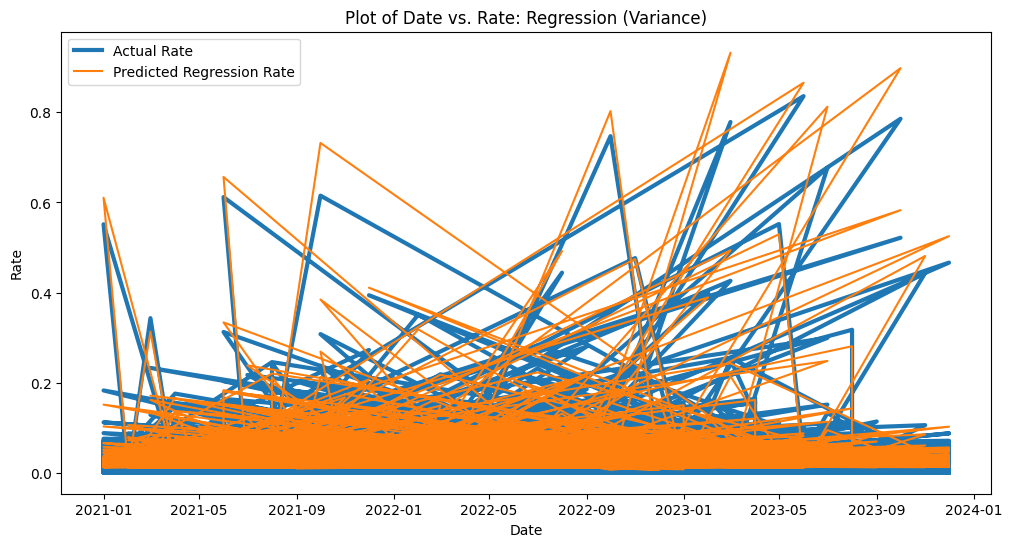

In [ ]:
plt.figure(figsize = (12, 6))

plt.plot(y_test.index, y_test, label = 'Actual Rate', linewidth = 3)
plt.plot(y_test.index, ypred_regression_var, label = 'Predicted Regression Rate', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Date vs. Rate: Regression (Variance)')
plt.legend()
plt.show()

In [ ]:
# 2nd method: SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# fitting
kbest = SelectKBest(f_regression, k = 'all')
X_train_kbest = kbest.fit_transform(X_train.drop(columns = 'Numerical Date'), y_train)
X_test_kbest = kbest.transform(X_test.drop(columns = 'Numerical Date'))
kbest_features = X_train.drop(columns = 'Numerical Date').columns[kbest.get_support()]

print(f'Number of features selected: {len(kbest_features)}'
f'\n\nChosen features: {kbest_features}')

Number of features selected: 62

Chosen features: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fatalities',
       'Bicyclist Fatalities', 'Pedes

In [ ]:
# scaling
X_train_kbest = sc.fit_transform(X_train_kbest)
X_test_kbest = sc.fit_transform(X_test_kbest)

In [ ]:
# training model
regression_kbest = LinearRegression()
regression_kbest.fit(X_train_kbest, y_train)

LinearRegression()

In [ ]:
# predicting
ypred_regression_kbest = regression_kbest.predict(X_test_kbest)

In [ ]:
mse_regression_kbest = mse(y_test, ypred_regression_kbest)
r2_regression_kbest = r2(y_test, ypred_regression_kbest)

# printing metrics
print(f'Selected Features Using KBest: {kbest_features}'
f'\n\nMSE: {mse_regression_kbest}'
f'\nR2: {r2_regression_kbest}')

Selected Features Using KBest: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fatalities',
       'Bicyclist Fatalities', 'Pedestrian in Crosswalk 

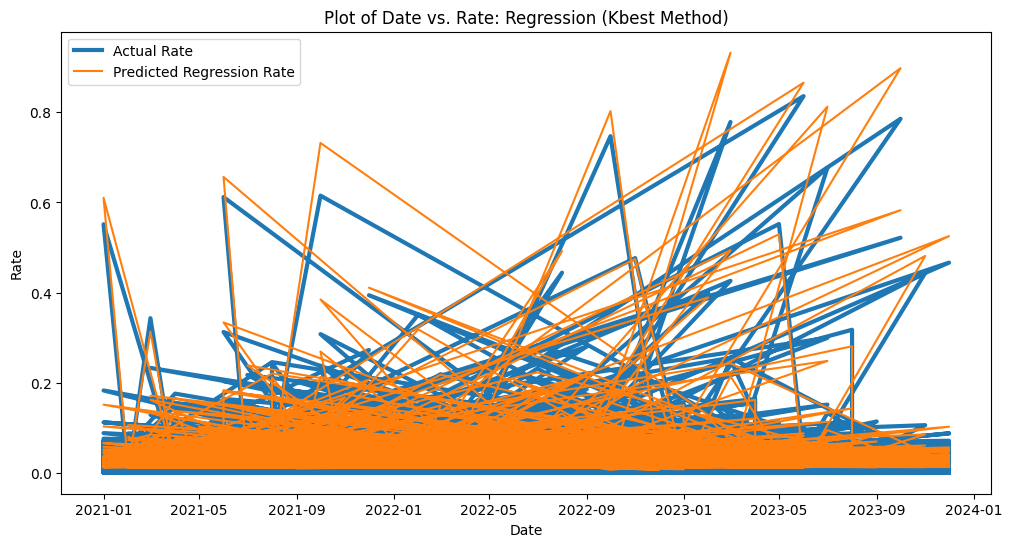

In [ ]:
plt.figure(figsize = (12, 6))

# plotting 'Total Injuries' & monthly ema
plt.plot(y_test.index, y_test, label = 'Actual Rate', linewidth = 3)
plt.plot(y_test.index, ypred_regression_kbest, label = 'Predicted Regression Rate', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Date vs. Rate: Regression (Kbest Method)')
plt.legend()
plt.show()

In [ ]:
# FORECASTING 2: SMA (Simple Moving Average)

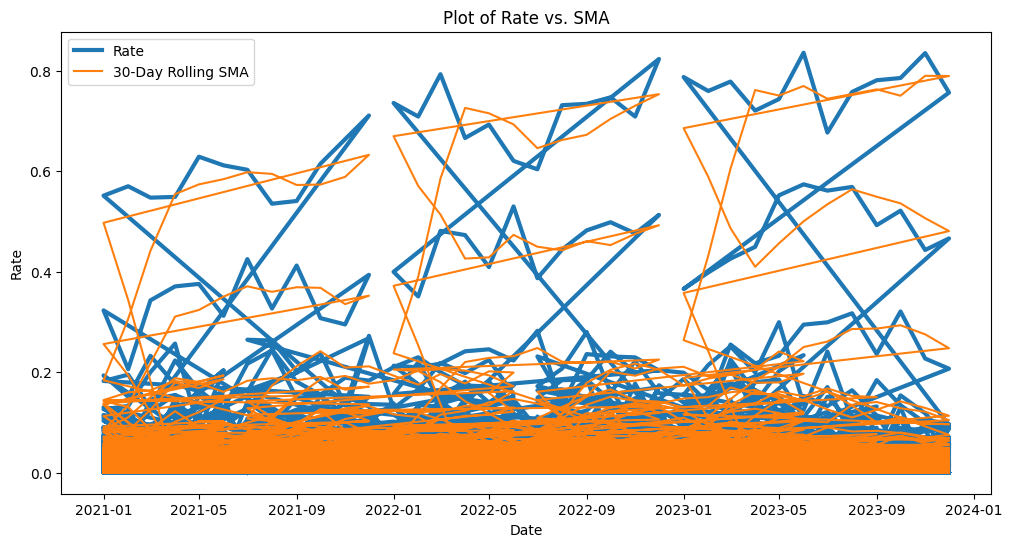

In [ ]:
# calculating SMA
sma = close.rolling(window = 4).mean() # monthly

# plotting
plt.figure(figsize = (12, 6))

# plotting 'Total Injuries' & monthly sma
plt.plot(close, label = 'Rate', linewidth = 3)
plt.plot(sma, label = '30-Day Rolling SMA', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Rate vs. SMA')
plt.legend()
plt.show()

In [ ]:
sma.isnull().sum()

3

In [ ]:
sma = sma.dropna() # dropping nulls
close_sma = close.shift(-3).dropna()
  # rolling window of size 4 means the first 3 values will be null bc not enough info to support size.
  # so we shift close by -3 and drop the nulls (the 3 at start)

mse_sma = round(mse(close_sma, sma), 5)
r2_sma = round(r2(close_sma, sma), 5)

# printing metrics
print(f'MSE: {mse_sma}'
f'\nR2: {r2_sma}')

MSE: 0.00042
R2: 0.65095


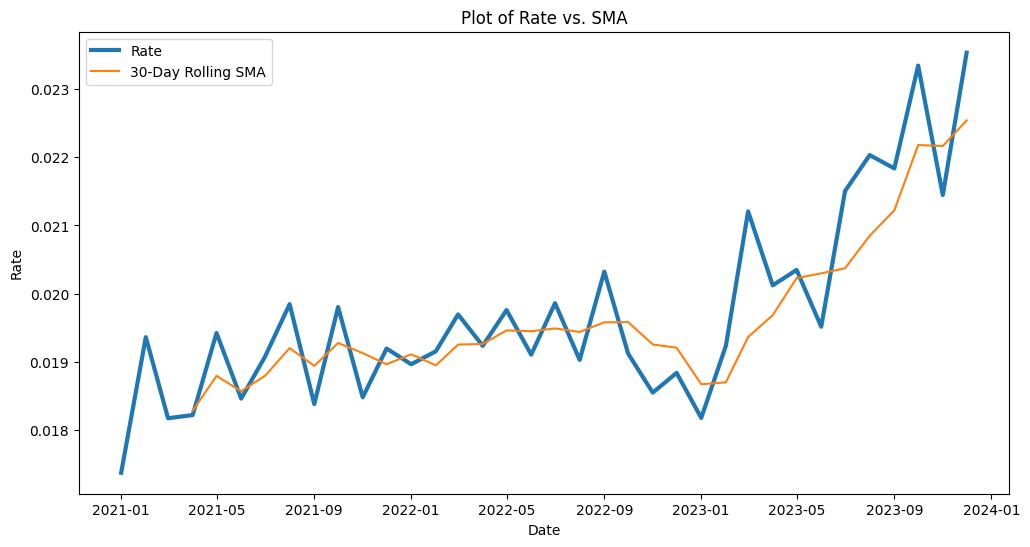

In [ ]:
# calculating SMA with groupby
sma_grouped = close_grouped.rolling(window = 4).mean() # monthly

# plotting
plt.figure(figsize = (12, 6))

# plotting 'Total Injuries' & monthly sma
plt.plot(close_grouped, label = 'Rate', linewidth = 3)
plt.plot(sma_grouped, label = '30-Day Rolling SMA', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Rate vs. SMA')
plt.legend()
plt.show()

In [ ]:
sma_grouped.isnull().sum()

3

In [ ]:
sma_grouped = sma_grouped.dropna() # dropping nulls
close_sma_grouped = close_grouped.shift(-3).dropna()
  # rolling window of size 4 means the first 3 values will be null bc not enough info to support size.
  # so we shift close by -3 and drop the nulls (the 3 at start)

mse_sma_grouped = round(mse(close_sma_grouped, sma_grouped), 5)
r2_sma_grouped = round(r2(close_sma_grouped, sma_grouped), 5)

# printing metrics
print(f'MSE: {mse_sma_grouped}'
f'\nR2: {r2_sma_grouped}')

MSE: 0.0
R2: 0.75902


In [ ]:
# FORECASTING 3: EMA (Exponential Moving Average)

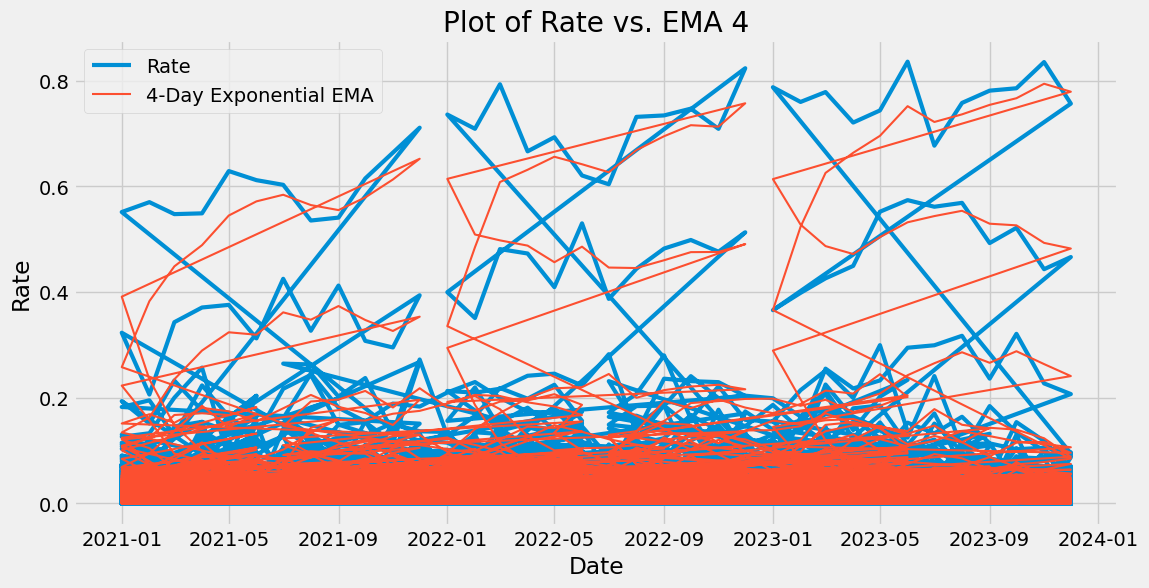

In [ ]:
# calculating EMA
ema = close.ewm(span = 4, adjust = False).mean()

# plotting
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 6))

# plotting 'Total Injuries' & monthly ema
plt.plot(close, label = 'Rate', linewidth = 3)
plt.plot(ema, label = '4-Day Exponential EMA', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Rate vs. EMA 4')
plt.legend()
plt.show()

In [ ]:
ema.isnull().sum()

0

In [ ]:
mse_ema = round(mse(close, ema), 5)
r2_ema = round(r2(close, ema), 5)

# printing metrics
print(f'MSE: {mse_ema}'
f'\nR2: {r2_ema}')

MSE: 0.00025
R2: 0.78903


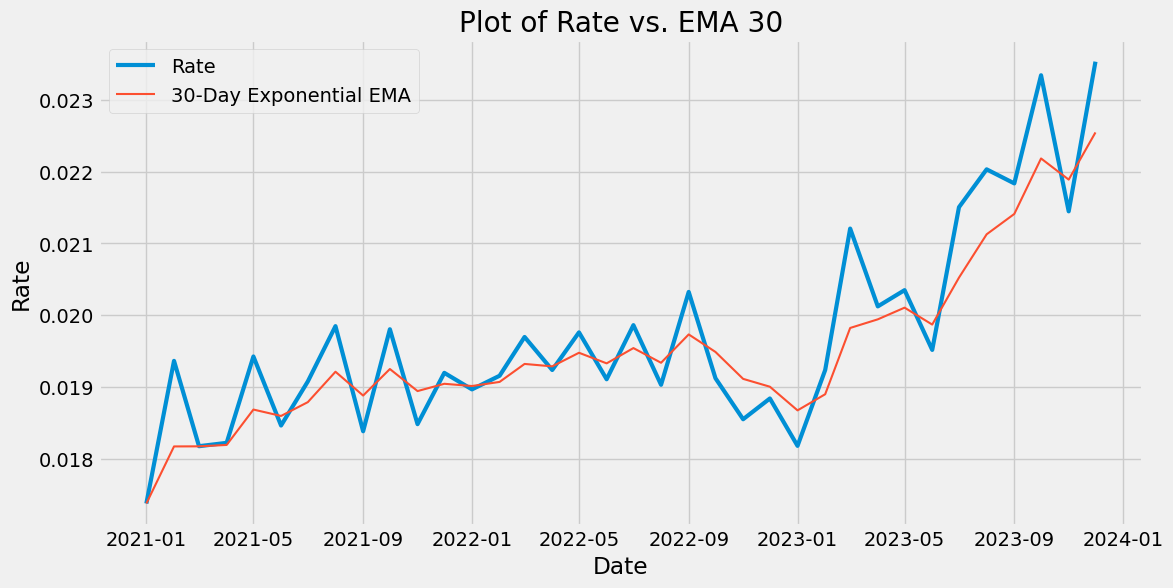

In [ ]:
# calculating EMA
ema_grouped = close_grouped.ewm(span = 4, adjust = False).mean()

# plotting
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 6))

# plotting 'Total Injuries' & monthly ema
plt.plot(close_grouped, label = 'Rate', linewidth = 3)
plt.plot(ema_grouped, label = '30-Day Exponential EMA', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Rate vs. EMA 30')
plt.legend()
plt.show()

In [ ]:
ema_grouped.isnull().sum()

0

In [ ]:
mse_ema_grouped = round(mse(close_grouped, ema_grouped), 5)
r2_ema_grouped = round(r2(close_grouped, ema_grouped), 5)

# printing metrics
print(f'MSE: {mse_ema_grouped}'
f'\nR2: {r2_ema_grouped}')

MSE: 0.0
R2: 0.83485


In [ ]:
# FORECASTING 4: RNN with Variance Method

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
import numpy as np

In [ ]:
X = data.drop(['Rate'], axis = 1) # don't need numerical date here.
y = data['Rate']

In [ ]:
# splitting
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# 1st method: low variance

var_selector = VarianceThreshold()

# training model based on the features
X_train_rnn_var = var_selector.fit_transform(X_train_rnn)
X_test_rnn_var = var_selector.transform(X_test_rnn)
var_features_rnn = X_train_rnn.columns[var_selector.get_support()]

print(f'Number of features selected: {len(var_features_rnn)}'
f'\n\nChosen features: {var_features_rnn}')

Number of features selected: 59

Chosen features: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fatalities',
       'Bicyclist Fatalities', 'Pedes

In [ ]:
X = data[var_features_rnn]

In [ ]:
# X = np.array(var_features_rnn).reshape(-1, 1, 1)
# y = np.array(y).reshape(-1, 1)

In [ ]:
train_size_rnn = int(len(X) * 0.7)
test_size_rnn = len(X) - train_size_rnn
X_train_rnn, X_test_rnn = X[0:train_size_rnn], X[train_size_rnn:len(X)]
y_train_rnn, y_test_rnn = y[0:train_size_rnn], y[train_size_rnn:len(y)]

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train_rnn.shape[1], 1)))
rnn.add(SimpleRNN(units = 50))
rnn.add(Dense(units = 1))

In [ ]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
rnn.fit(X_train_rnn, y_train_rnn, epochs = 10, batch_size = 32)

Epoch 1/10
870/870 [==============================] - 28s 27ms/step - loss: 0.0027
Epoch 2/10
870/870 [==============================] - 21s 24ms/step - loss: 6.8970e-04
Epoch 3/10
870/870 [==============================] - 23s 27ms/step - loss: 6.7978e-04
Epoch 4/10
870/870 [==============================] - 34s 39ms/step - loss: 6.6288e-04
Epoch 5/10
870/870 [==============================] - 34s 39ms/step - loss: 6.6109e-04
Epoch 6/10
870/870 [==============================] - 39s 44ms/step - loss: 6.4499e-04
Epoch 7/10
870/870 [==============================] - 23s 26ms/step - loss: 6.3879e-04
Epoch 8/10
870/870 [==============================] - 22s 25ms/step - loss: 6.3795e-04
Epoch 9/10
870/870 [==============================] - 31s 36ms/step - loss: 6.2131e-04
Epoch 10/10
870/870 [==============================] - 24s 28ms/step - loss: 6.1707e-04


In [ ]:
# evaluating the RNN Variance model
ypred_rnn_var = rnn.predict(X_test_rnn)
score_var = rnn.evaluate(X_test_rnn, y_test_rnn, verbose = 0)

# metrics
r2_rnn_var = r2(y_test_rnn, ypred_rnn_var)

# printing metrics
print(f'Selected Features Using Variance Method: {var_features_rnn}'
f'\n\nMSE: {round(score_var, 5)}'
f'\nR2: {round(r2_rnn_var, 5)}')

373/373 [==============================] - 4s 11ms/step
Selected Features Using Variance Method: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fat

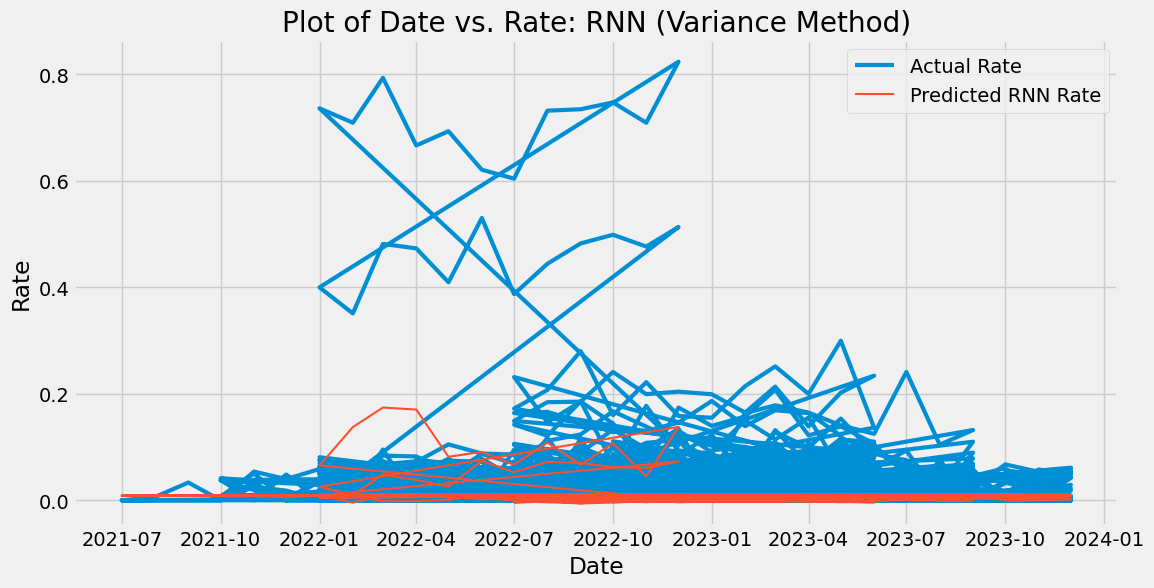

In [ ]:
plt.figure(figsize = (12, 6))

# plotting 'Rate' & RNN
plt.plot(y_test_rnn.index, y_test_rnn, label = 'Actual Rate', linewidth = 3)
plt.plot(y_test_rnn.index, ypred_rnn_var, label = 'Predicted RNN Rate', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Date vs. Rate: RNN (Variance Method)')
plt.legend()
plt.show()

In [ ]:
# FORECASTING 5: RNN with KBest

In [ ]:
X = data.drop(['Rate'], axis = 1) # don't need numerical date here.
y = data['Rate']

In [ ]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
kbest = SelectKBest(f_regression, k = 'all')

kbest.fit(X_train, y_train)

X_train_kbest = kbest.transform(X_train)
X_test_kbest = kbest.transform(X_test)

In [ ]:
kbest_features_rnn = X_train.columns[var_selector.get_support()]

print(f'Number of features selected: {len(kbest_features_rnn)}'
f'\n\nChosen features: {kbest_features_rnn}')

Number of features selected: 59

Chosen features: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fatalities',
       'Bicyclist Fatalities', 'Pedes

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train_kbest.shape[1], 1)))
rnn.add(SimpleRNN(units = 50))
rnn.add(Dense(units = 1))

In [ ]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn.fit(X_train_kbest, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
870/870 [==============================] - 26s 28ms/step - loss: 0.0029
Epoch 2/5
870/870 [==============================] - 29s 33ms/step - loss: 8.2773e-04
Epoch 3/5
870/870 [==============================] - 25s 28ms/step - loss: 7.8484e-04
Epoch 4/5
870/870 [==============================] - 23s 26ms/step - loss: 7.6087e-04
Epoch 5/5
870/870 [==============================] - 25s 29ms/step - loss: 7.0800e-04


In [ ]:
# evaluating the RNN Variance model
ypred_rnn_kbest = rnn.predict(X_test_kbest)
score_kbest = rnn.evaluate(X_test_kbest, y_test, verbose = 0)

# metrics
r2_rnn_kbest = r2(y_test, ypred_rnn_kbest)

# printing metrics
print(f'Selected Features Using Variance Method: {kbest_features_rnn}'
f'\n\nMSE: {round(score_kbest, 5)}'
f'\nR2: {round(r2_rnn_kbest, 5)}')

373/373 [==============================] - 4s 10ms/step
Selected Features Using Variance Method: Index(['NTD ID', 'Agency', 'Organization Type', 'Mode', 'Type of Service',
       'Rail (True/False)', 'Primary UZA UACE Code', 'Primary UZA Name',
       'Primary UZA Sq Miles', 'Primary UZA Population',
       'Service Area Sq Miles', 'Service Area Population', 'Vehicles',
       'Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Collisions with Motor Vehicle',
       'Collisions with Person', 'Collisions with Fixed Object',
       'Collisions with Rail Vehicle', 'Collisions with Bus Vehicle',
       'Collisions with Other', 'Total Collisions', 'Total Derailments',
       'Total Fires', 'Total Security Events',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Operator Fatalities', 'Other Employee Fatalities',
       'Total Employee Fatalities', 'Other Worker Fat

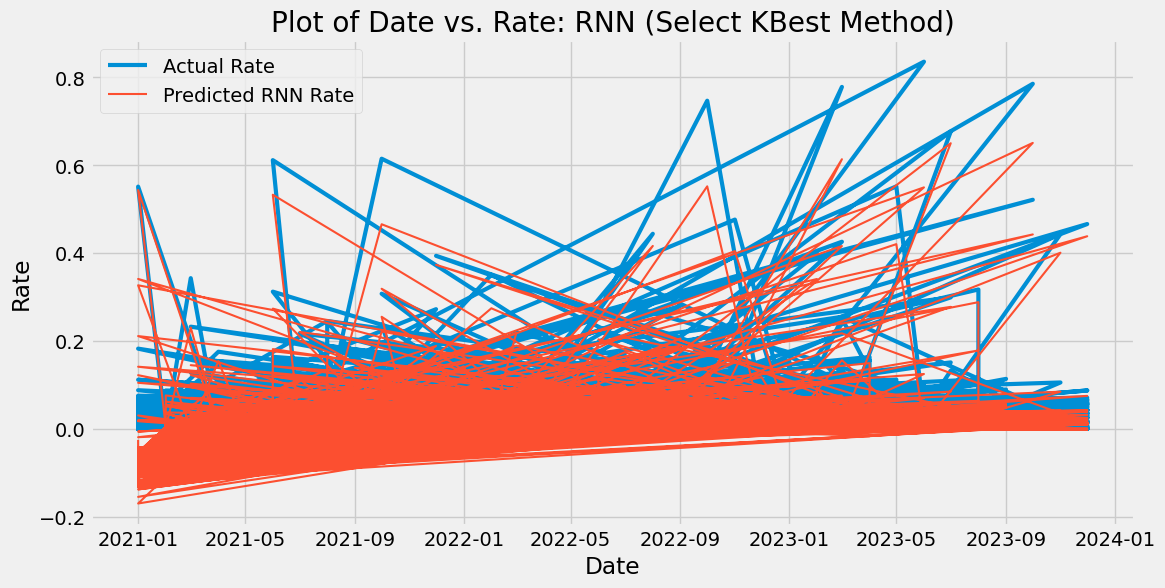

In [ ]:
plt.figure(figsize = (12, 6))

# plotting 'Rate' & RNN
plt.plot(y_test.index, y_test, label = 'Actual Rate', linewidth = 3)
plt.plot(y_test.index, ypred_rnn_kbest, label = 'Predicted RNN Rate', linewidth = 1.5)

# titles and axis
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Plot of Date vs. Rate: RNN (Select KBest Method)')
plt.legend()
plt.show()

In [ ]:
# Creating a bar chart to compare all models' metrics

# saving all metrics calculated
values = {'MSE': [mse_regression_var, mse_regression_kbest, mse_sma, mse_sma_grouped, mse_ema, mse_ema_grouped, score_var, score_kbest],
           'R2': [r2_regression_var, r2_regression_kbest, r2_sma, r2_sma_grouped, r2_ema, r2_ema_grouped, r2_rnn_var, r2_rnn_kbest]}

models = ['Regression Variance', 'Regression KBest', 'SMA', 'SMA Grouped', 'EMA', 'EMA Grouped', 'RNN Variance', 'RNN KBest']
metrics = pd.DataFrame(values, index = models)

In [ ]:
metrics # checking it

,MSE,R2
Regression Variance,0.000461,0.591597
Regression KBest,0.000461,0.591597
SMA,0.000420,0.650950
SMA Grouped,0.000000,0.759020
EMA,0.000250,0.789030
EMA Grouped,0.000000,0.834850
RNN Variance,0.001277,0.022782
RNN KBest,0.000780,0.308708


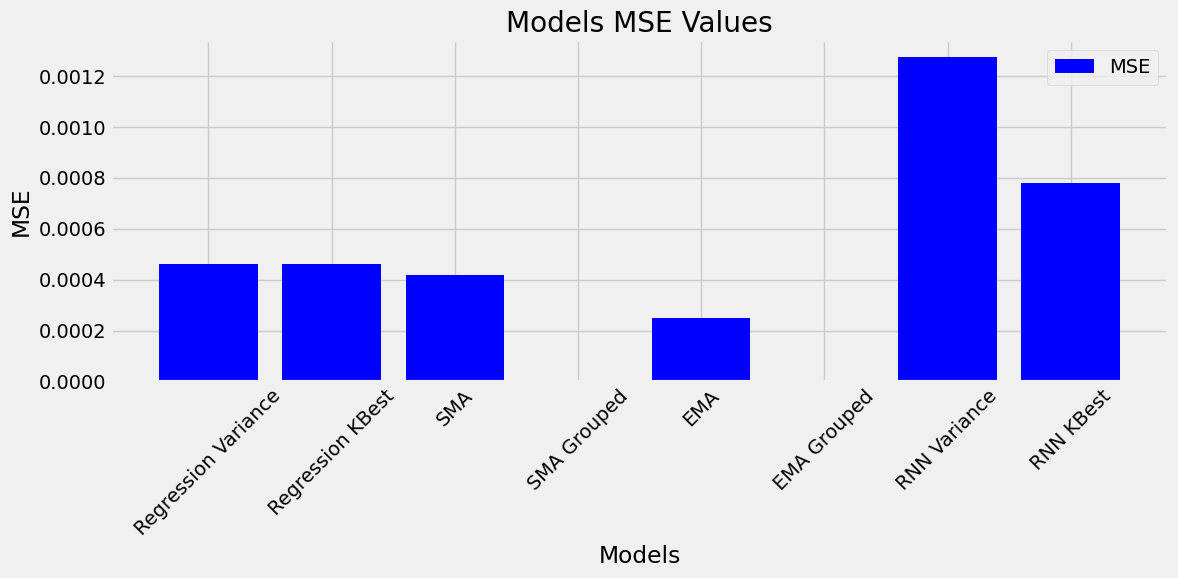

In [ ]:
# plotting bar chart

# MSE subplot
plt.figure(figsize = (12, 6))
plt.bar(metrics.index, metrics['MSE'], color = 'blue', label = 'MSE')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title(f'Models MSE Values')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# the lower the mse, the lower the error, the better.

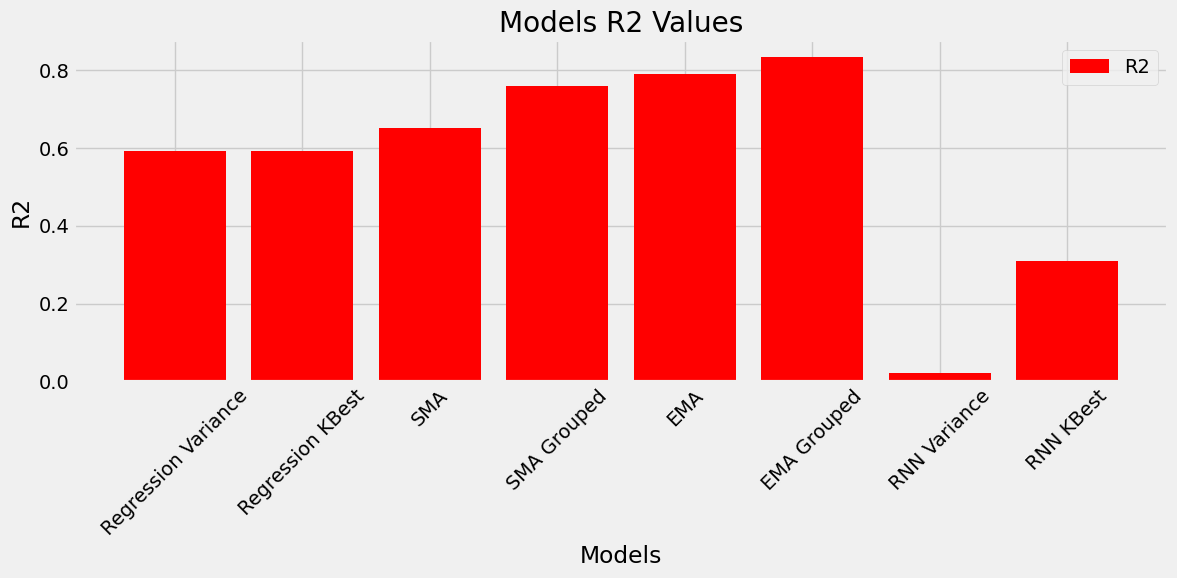

In [ ]:
# plotting bar chart

# R2 subplot
plt.figure(figsize = (12, 6))
plt.bar(metrics.index, metrics['R2'], color = 'red', label = 'R2')
plt.xlabel('Models')
plt.ylabel('R2')
plt.title(f'Models R2 Values')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# the higher the R2, the more fit, the better.

In [ ]:
# PART 1 TASK 2 - Linear Programming

In [ ]:
from scipy.optimize import linprog

# coefficients in the equations
c = [-10, -8, -7, -6, -5, -4, -3, -2, -1]
  # using negative for MINIMIZING

# Resource Allocation
a = [[1, 2, 1, 1, 2, 1, 1, 1, 1]]

# Upper Bounds
b = [100]

# Limits: 0 to 10 inclusive
x1_bounds = (0, 10)
x2_bounds = (0, 10)
x3_bounds = (0, 10)
x4_bounds = (0, 10)
x5_bounds = (0, 10)
x6_bounds = (0, 10)
x7_bounds = (0, 10)
x8_bounds = (0, 10)
x9_bounds = (0, 10)

In [ ]:
res = linprog(c,
              A_ub = a,
              b_ub = b,
              bounds = [x1_bounds, x2_bounds, x3_bounds,
                        x4_bounds, x5_bounds, x6_bounds,
                        x7_bounds, x8_bounds, x9_bounds],
              method = 'highs') # highs = minimizing

In [ ]:
# printing result
if res.success:

    # printing num. of allocated resources for each.
    print(f'Optimal solution found: \n'
    f'X1: {res.x[0]}\n'
    f'X2: {res.x[1]}\n'
    f'X3: {res.x[2]}\n'
    f'X4: {res.x[3]}\n'
    f'X5: {res.x[4]}\n'
    f'X6: {res.x[5]}\n'
    f'X7: {res.x[6]}\n'
    f'X8: {res.x[7]}\n'
    f'X9: {res.x[8]}\n'
    f'\nCost: $ {-res.fun}') # finding the profit made

else:
    print('Optimization failed, check constraints :(')

Optimal solution found: 
X1: 10.0
X2: 10.0
X3: 10.0
X4: 10.0
X5: 10.0
X6: 10.0
X7: 10.0
X8: 10.0
X9: -0.0

Cost: $ 450.0
